<a href="https://colab.research.google.com/github/vincentjunitio00/Contrast-Stretching/blob/main/Contrast_Stretching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First of all, import all the library. Read the images from a link, not download (this is to ensure that there is no copyright infringement). For images with 3 channels, I am going to convert it to grayscale.

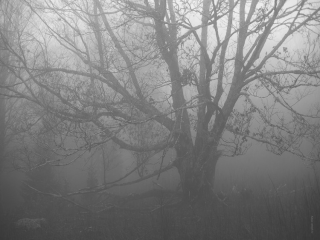

In [264]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from skimage import io

# Insert and read image from link
# There are three images available feel free to uncomment one of them
img = io.imread('https://i2.wp.com/digital-photography-school.com/wp-content/uploads/2018/02/black-and-white-low-contrast-fog.jpg?resize=750%2C500&ssl=1')
# img = io.imread('https://i1.wp.com/abrittonphotography.com/wp-content/uploads/2017/12/low-contrast-.png?resize=825%2C550')
# img = io.imread('https://images.unsplash.com/photo-1587149356543-5ac32b5c6b78?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=600&q=60')

dim = (320, 240) # Set the dimension of the image
img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA) # Resizing the image to the dimension above

if len(img.shape) != 2: # If the image have 3 channels means the shape will have 3 length and I am going to convert it to grayscale
  img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

cv2_imshow(img)

Contrast Stretching formula: \
$ final\_pixel = \frac{(b-a)}{(maximal - minimal)} * (initial\_pixel - minimal) + a$

In [249]:
def contrast_stretching(images):
  ''' This function stretch the contrast of the image.
  a is the lowest range of our stretching;
  b is the highest range of our stretching;
  '''
  a = 0 # Minimum pixel value is 0
  b = 255 # Maximum pixel value is 255
  (rows, cols) = images.shape

  images = np.ravel(images) # np.ravel flattened the array into 1-D

  minimal = min(images) # Get the minimum pixel value in the images
  maximal = max(images) # Get the maximum pixel value in the images

  result = []
  for value in images:
    rule = (b - a)/(maximal - minimal) + a
    result.append(rule)
  return np.array(result).reshape(rows, cols) # Reshape back the array into the dimension we set above

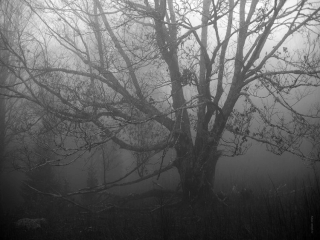

In [265]:
processed = contrast_stretching(img)
cv2_imshow(processed) # Display the processed image

Let's compare the before and after contrast stretching. It emphasizes out more details than the unprocessed one, and the processed one looks better and beautiful. :D.

Before


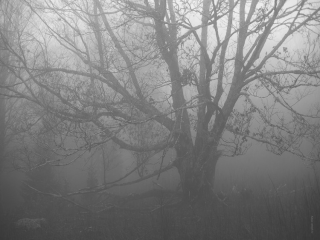

After


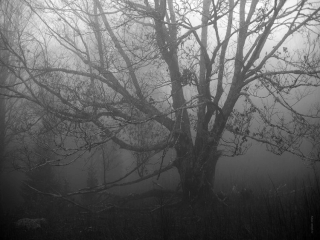

In [268]:
print("Before")
cv2_imshow(img)

print("After")
cv2_imshow(processed)

Hope you guys enjoy it! Feel free to use the function code and change the minimum and maximum value (a and b).